In [1]:
# Importing packages...
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Reading data...
df_train = pd.read_csv('ML_Artivatic_dataset\\train_indessa.csv')
df_test = pd.read_csv('ML_Artivatic_dataset\\test_indessa.csv')

In [3]:
# seeing the data, head : for features
df_train.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
df_train = df_train[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
df_test = df_test[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

In [5]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''

print('Transform: term...')
df_train['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df_test['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df_train['term'] = pd.to_numeric(df_train['term'], errors='coerce')
df_test['term'] = pd.to_numeric(df_test['term'], errors='coerce')

print('Transform: emp_length...')
df_train['emp_length'].replace('n/a', '0', inplace=True)
df_train['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df_test['emp_length'].replace('n/a', '0', inplace=True)
df_test['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df_train['emp_length'] = pd.to_numeric(df_train['emp_length'], errors='coerce')
df_test['emp_length'] = pd.to_numeric(df_test['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
df_train['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df_test['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df_train['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df_test['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df_train['last_week_pay'] = pd.to_numeric(df_train['last_week_pay'], errors='coerce')
df_test['last_week_pay'] = pd.to_numeric(df_test['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
df_train['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df_train['sub_grade'] = pd.to_numeric(df_train['sub_grade'], errors='coerce')
df_test['sub_grade'] = pd.to_numeric(df_test['sub_grade'], errors='coerce')

print('Transform done.')


Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [6]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    df_train[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [7]:
'''
Feature Engineering
'''
pd.set_option('mode.chained_assignment', None)
# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(df_test['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(df_train['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
final_train = df_train[selected_cols]
final_test = df_test[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
final_train['loan_to_income'] = final_train['annual_inc']/final_train['funded_amnt']
final_test['loan_to_income'] = final_test['annual_inc']/final_test['funded_amnt']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
final_train['bad_state'] = final_train['acc_now_delinq'] + (final_train['total_rec_late_fee']/final_train['funded_amnt']) + (final_train['recoveries']/final_train['funded_amnt']) + (final_train['collection_recovery_fee']/final_train['funded_amnt_inv']) + (final_train['collections_12_mths_ex_med']/final_train['funded_amnt_inv'])
final_test['bad_state'] = final_test['acc_now_delinq'] + (final_test['total_rec_late_fee']/final_test['funded_amnt']) + (final_test['recoveries']/final_test['funded_amnt']) + (final_test['collection_recovery_fee']/final_test['funded_amnt_inv']) + (final_train['collections_12_mths_ex_med']/final_test['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
final_train.loc[final_train['bad_state'] > 0, 'bad_state'] = 1
final_test.loc[final_test['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
final_train['avl_lines'] = final_train['total_acc'] - final_train['open_acc']
final_test['avl_lines'] = final_test['total_acc'] - final_test['open_acc']


# Interest paid so far
final_train['int_paid'] = final_train['total_rec_int'] + final_train['total_rec_late_fee']
final_test['int_paid'] = final_test['total_rec_int'] + final_test['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
final_train['emi_paid_progress_perc'] = ((final_train['last_week_pay']/(final_train['term']/12*52+1))*100)
final_test['emi_paid_progress_perc'] = ((final_test['last_week_pay']/(final_test['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
final_train['total_repayment_progress'] = ((final_train['last_week_pay']/(final_train['term']/12*52+1))*100) + ((final_train['recoveries']/final_train['funded_amnt']) * 100)
final_test['total_repayment_progress'] = ((final_test['last_week_pay']/(final_test['term']/12*52+1))*100) + ((final_test['recoveries']/final_test['funded_amnt']) * 100)

In [8]:
final_train.head()

,member_id,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,...,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
0,58189336,9.0,14350,14350,14350.0,43,19.19,28700.0,33.88,50.0,...,0.0,36,0.0,0.0,2.000000,0.0,14.0,1173.84,16.560510,16.560510
1,70011223,0.0,4800,4800,4800.0,14,10.99,65000.0,3.64,31.0,...,0.0,36,0.0,0.0,13.541667,0.0,7.0,83.95,5.732484,5.732484
2,70255675,2.0,10000,10000,10000.0,4,7.26,45000.0,18.42,31.0,...,0.0,36,0.0,0.0,4.500000,0.0,14.0,56.47,5.732484,5.732484
3,1893936,10.0,15000,15000,15000.0,35,19.72,105000.0,14.97,46.0,...,0.0,36,0.0,0.0,7.000000,0.0,11.0,4858.62,85.987261,85.987261
4,7652106,10.0,16000,16000,16000.0,12,10.64,52000.0,20.16,31.0,...,0.0,36,0.0,0.0,3.250000,0.0,16.0,2296.41,61.146497,61.146497


In [9]:
'''
Split data set into train-test-cv
Train model & predict
'''
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(final_train), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...


C:\Users\Anu\anaconda3\envs\ML2\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Anu\anaconda3\envs\ML2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-auc:0.96923
[1]	validation_0-auc:0.96947
[2]	validation_0-auc:0.97015
[3]	validation_0-auc:0.97076
[4]	validation_0-auc:0.97097
[5]	validation_0-auc:0.97125
[6]	validation_0-auc:0.97165
[7]	validation_0-auc:0.97198
[8]	validation_0-auc:0.97211
[9]	validation_0-auc:0.97227
[10]	validation_0-auc:0.97242
[11]	validation_0-auc:0.97248
[12]	validation_0-auc:0.97257
[13]	validation_0-auc:0.97265
[14]	validation_0-auc:0.97270
[15]	validation_0-auc:0.97271
[16]	validation_0-auc:0.97276
[17]	validation_0-auc:0.97281
[18]	validation_0-auc:0.97290
[19]	validation_0-auc:0.97302
[20]	validation_0-auc:0.97306
[21]	validation_0-auc:0.97312
[22]	validation_0-auc:0.97318
[23]	validation_0-auc:0.97325
[24]	validation_0-auc:0.97331
[25]	validation_0-auc:0.97331
[26]	validation_0-auc:0.97337
[27]	validation_0-auc:0.97337
[28]	validation_0-auc:0.97342
[29]	validation_0-auc:0.97349
[30]	validation_0-auc:0.97354
[31]	validation_0-auc:0.97361
[32]	validation_0-auc:0.97365
[33]	validation_0-au

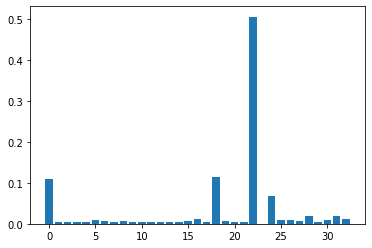

In [10]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(final_test)))
dfSub = pd.concat([test_member_id, final_pred.iloc[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_train):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

In [11]:
final_train.shape

(532428, 33)